<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/l3_revisit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
! {sys.executable} -m pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.12)


In [3]:
!pip install ipdb

     |████████████████████████████████| 788kB 17.1MB/s 
     |████████████████████████████████| 368kB 32.9MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.7-cp37-none-any.whl size=11434 sha256=b91e68ba1cdfd0156037946e4901d65b0ade465416f832a8579e5511a9c50fc1
  Stored in directory: /root/.cache/pip/wheels/69/e2/66/bde554f8029ad1c5288f3bf427a78b18ec670182d7e670efe6
Successfully built ipdb
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.23.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [4]:
from ipdb import set_trace as st

In [4]:
! mkdir -p ~/.kaggle

In [5]:
!touch kaggle.json

In [6]:
with open("kaggle.json", "w") as f:
  f.write('{"username":"bindelapranay1997","key":"bdb79e73f245e0e2e44c3c2f3ba7848e"}')
  

In [7]:
!mv kaggle.json ~/.kaggle/

In [8]:
path = Config.data_path()/'planet'
path.mkdir(parents = True, exist_ok = True)
path.ls()

[]

In [9]:
path

PosixPath('/root/.fastai/data/planet')

In [10]:
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
!touch cookie.txt

In [29]:
cookie_str = "CfDJ8LdUzqlsSWBPr4Ce3rb9VL8JFrYo-jMQCk0bf4eGo6zdxxM3dri5vIncObU6ZcVqbYkm84NEgdkv-rOY11afW__vn6av9QLb8xHSuLj3HCqey_DlOl7w8jeZKq09BLZ7Mte5wt3WU78S0916eGjqgQEqtOQWkQjSmmm2mP5xCYYSHuv04swCPNsHvfBDjXMVDA"
with open("cookie.txt", "w") as f:
  f.write(cookie_str)

In [12]:
path = untar_data(URLs.PLANET_TINY)

In [13]:
path.ls()

[PosixPath('/root/.fastai/data/planet_tiny/train'),
 PosixPath('/root/.fastai/data/planet_tiny/labels.csv')]

In [14]:
#test
(path/'train').ls()[:5]

[PosixPath('/root/.fastai/data/planet_tiny/train/train_24353.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_31179.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_31979.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_16718.jpg'),
 PosixPath('/root/.fastai/data/planet_tiny/train/train_28430.jpg')]

In [15]:

df = pd.read_csv(path/'labels.csv')
df.head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [16]:
#test
a = df[df['image_name'] == 'train_39539'].index[0]
df["tags"][2].split(" ")

['clear', 'primary', 'water']

In [17]:
#test
(path/'train').ls()[0].name

'train_24353.jpg'

In [19]:
def get_lables(img_path):
  a = img_path.name.split(".")[0]
  b = df[df['image_name'] == a].index[0]
  return df["tags"][b].split(" ")

In [20]:
get_lables((path/'train').ls()[5])

['habitation', 'haze', 'primary', 'road']

In [21]:
src = ImageList.from_folder(path/'train').split_by_rand_pct(0.1).label_from_func(get_lables)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [22]:
src

LabelLists;

Train: LabelList (180 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,agriculture;clear;primary;road,cloudy,clear;cultivation;primary,agriculture;clear;cultivation;primary;road
Path: /root/.fastai/data/planet_tiny/train;

Valid: LabelList (20 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
clear;primary,agriculture;clear;habitation;primary;road,agriculture;partly_cloudy;primary;water,agriculture;cultivation;partly_cloudy;primary;road;water,agriculture;clear;primary;road
Path: /root/.fastai/data/planet_tiny/train;

Test: None

In [23]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [24]:
bs = 32
data = src.transform(get_transforms(flip_vert=True, max_warp=0.0)).databunch(bs = bs).normalize(imagenet_stats)

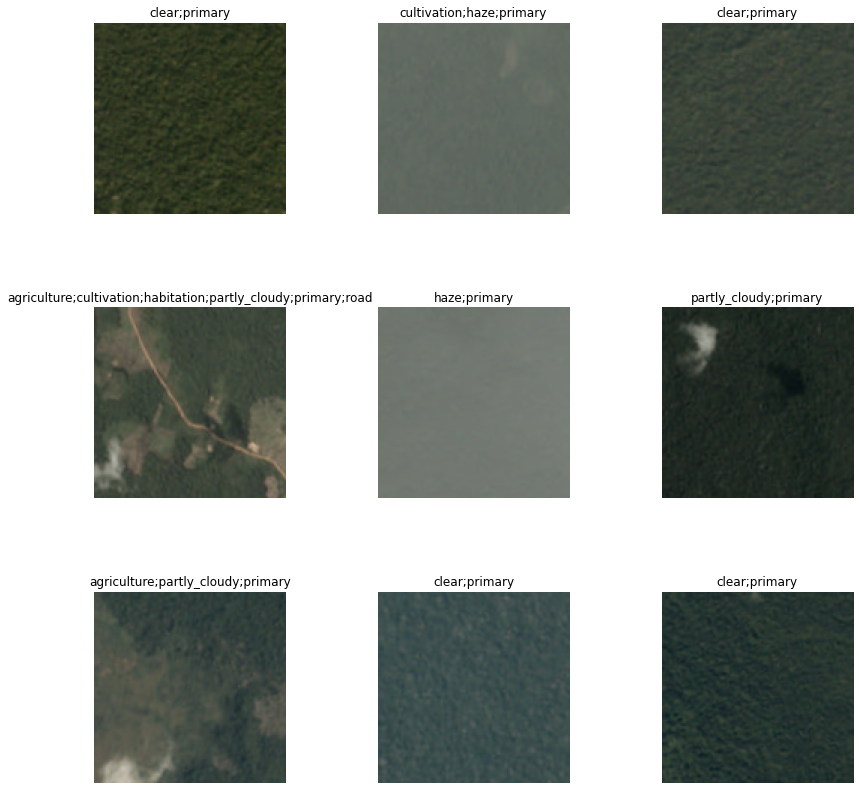

In [25]:
data.show_batch(rows = 3)

In [26]:
learn = cnn_learner(data, models.resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,1.076819,#na#,00:00
1,1.054678,#na#,00:00
2,1.056268,#na#,00:00
3,1.056661,#na#,00:00
4,1.054354,#na#,00:00
5,1.058051,#na#,00:00
6,1.051959,#na#,00:00
7,1.053361,#na#,00:00
8,1.048500,#na#,00:00
9,1.036024,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


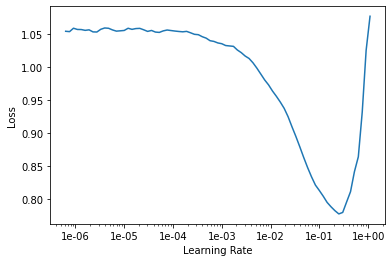

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(3, 4e-02)

epoch,train_loss,valid_loss,time
0,1.048229,3.715101,00:00
1,0.810779,1.786168,00:00
2,0.651554,0.810734,00:00


In [34]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,0.354645,#na#,00:00
1,0.343080,#na#,00:00
2,0.347985,#na#,00:00
3,0.353840,#na#,00:00
4,0.349922,#na#,00:00
5,0.347060,#na#,00:00
6,0.349708,#na#,00:00
7,0.337886,#na#,00:00
8,0.325955,#na#,00:00
9,0.320291,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


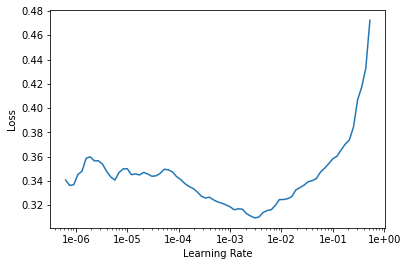

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(5, 1e-03)

epoch,train_loss,valid_loss,time
0,0.355843,0.805265,00:00
1,0.334607,0.924103,00:00
2,0.337243,0.637295,00:00
3,0.315061,0.319511,00:00
4,0.302935,0.270824,00:00


In [6]:
path = untar_data(URLs.CAMVID_TINY)

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/camvid_tiny/codes.txt'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels'),
 PosixPath('/root/.fastai/data/camvid_tiny/images')]

In [8]:
len((path/'labels').ls())

100

In [9]:
path_img, path_lbl = path/'images', path/'labels'

In [10]:
path_img.ls()[:5], path_lbl.ls()[:5]

([PosixPath('/root/.fastai/data/camvid_tiny/images/Seq05VD_f01080.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_05310.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_08550.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/images/Seq05VD_f01950.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/images/0016E5_06810.png')],
 [PosixPath('/root/.fastai/data/camvid_tiny/labels/0006R0_f02910_P.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_08370_P.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_05310_P.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/labels/0001TP_008940_P.png'),
  PosixPath('/root/.fastai/data/camvid_tiny/labels/0016E5_08340_P.png')])

In [11]:
test = open_image(path_lbl/'Seq05VD_f01950_P.png')
test, test.size

(Image (3, 96, 128), torch.Size([96, 128]))

In [51]:
campath = untar_data(URLs.CAMVID)

In [52]:
campath.ls()

[PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images')]

In [61]:
nt = (campath/'images').ls()[0]
nti = open_image(nt)
nti.size

torch.Size([720, 960])

In [12]:
gc.collect()

88

In [13]:
#test
a = path_img.ls()[0]
a.name

'Seq05VD_f01080.png'

In [71]:
a = "a_v_c"
a.rsplit("_", 1)

['a_v', 'c']

In [14]:
def get_lbl(im_path):
  z = path_lbl/f'{im_path.name.split(".")[0]}_P.png'
  return z

In [15]:
path.ls()

[PosixPath('/root/.fastai/data/camvid_tiny/codes.txt'),
 PosixPath('/root/.fastai/data/camvid_tiny/labels'),
 PosixPath('/root/.fastai/data/camvid_tiny/images')]

In [16]:
!cat /root/.fastai/data/camvid_tiny/codes.txt

Animal
Archway
Bicyclist
Bridge
Building
Car
CartLuggagePram
Child
Column_Pole
Fence
LaneMkgsDriv
LaneMkgsNonDriv
Misc_Text
MotorcycleScooter
OtherMoving
ParkingBlock
Pedestrian
Road
RoadShoulder
Sidewalk
SignSymbol
Sky
SUVPickupTruck
TrafficCone
TrafficLight
Train
Tree
Truck_Bus
Tunnel
VegetationMisc
Void
Wall


In [ ]:
codes = []
with open(path/'codes.txt', "r") as f:
  codes = [i.strip() for i in f.readlines()]
codes

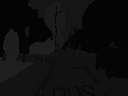

In [88]:
open_image(get_lbl(path_img.ls()[0]))

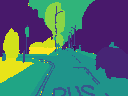

In [27]:
open_mask(get_lbl(path_img.ls()[0]))

In [31]:
src = SegmentationItemList.from_folder(path_img)

In [32]:
src = src.split_by_rand_pct()

In [33]:
src = src.label_from_func(get_lbl, classes = codes)

In [34]:
src

LabelLists;

Train: LabelList (80 items)
x: SegmentationItemList
Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
y: SegmentationLabelList
ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128)
Path: /root/.fastai/data/camvid_tiny/images;

Valid: LabelList (20 items)
x: SegmentationItemList
Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
y: SegmentationLabelList
ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128)
Path: /root/.fastai/data/camvid_tiny/images;

Test: None

In [37]:
bs = 8
data = src.transform(get_transforms(max_lighting=0.0, p_lighting=0.0), tfm_y = True).databunch(bs = 8).normalize(imagenet_stats)

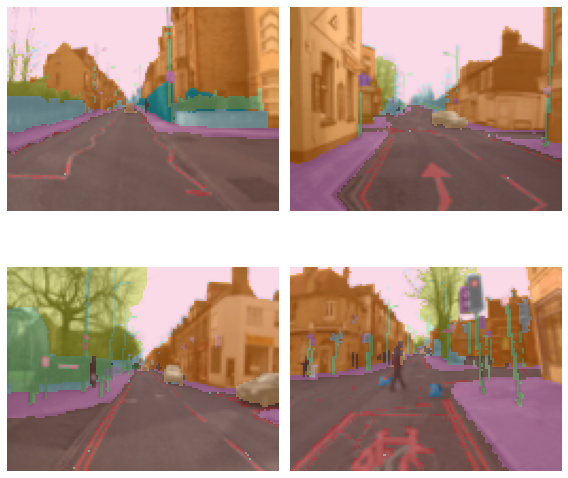

In [38]:
data.show_batch(rows = 2)

In [39]:
arch = models.resnet34
learn = unet_learner(data, arch)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [40]:
learn.lr_find()

epoch,train_loss,valid_loss,time
0,3.921335,#na#,00:01
1,3.838202,#na#,00:00
2,3.656777,#na#,00:00
3,3.390056,#na#,00:00
4,2.977614,#na#,00:00
5,2.755193,#na#,00:00
6,5.270181,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


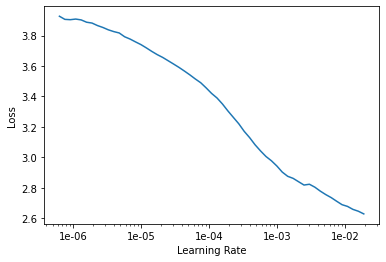

In [41]:
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(2, 3e-04)

epoch,train_loss,valid_loss,time
0,1.694708,1.513866,00:00
1,1.508090,1.390660,00:00


epoch,train_loss,valid_loss,time
0,1.307879,#na#,00:00
1,1.305663,#na#,00:00
2,1.292762,#na#,00:00
3,1.259980,#na#,00:00
4,1.225755,#na#,00:00
5,1.427469,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


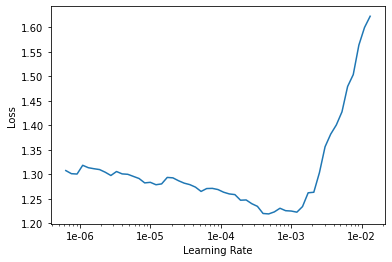

In [44]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(8, 1e-04)

epoch,train_loss,valid_loss,time
0,1.289881,1.400163,00:01
1,1.256361,1.266433,00:00
2,1.188834,1.085892,00:00
3,1.123029,1.076911,00:00
4,1.061066,0.964550,00:00
5,1.010080,0.901084,00:01
6,0.966691,0.880191,00:00
7,0.931934,0.876184,00:01


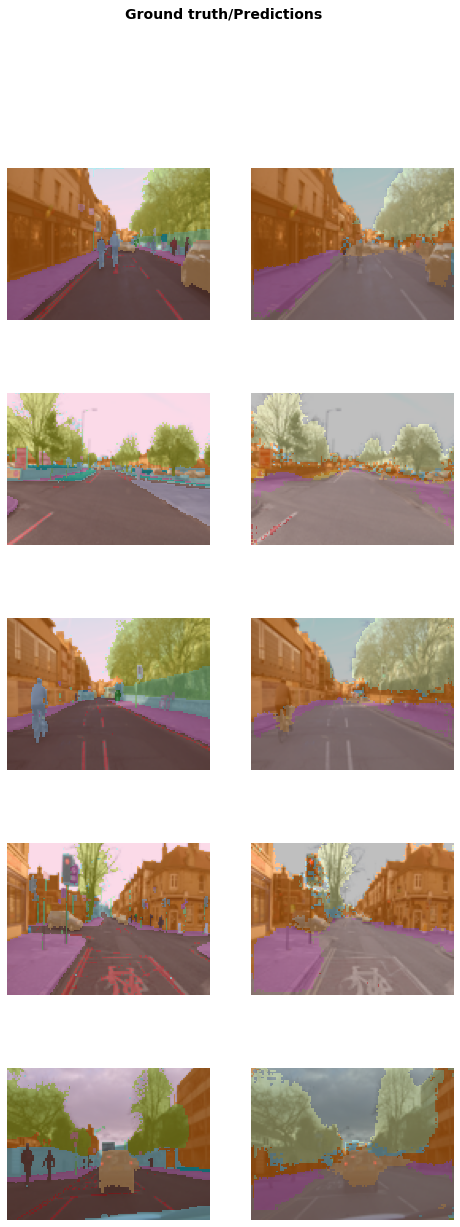

In [46]:
learn.show_results()

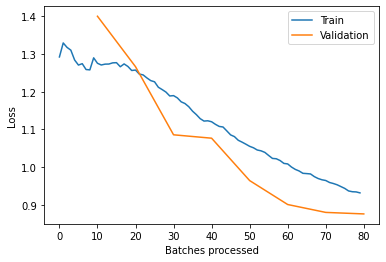

In [47]:
learn.recorder.plot_losses()

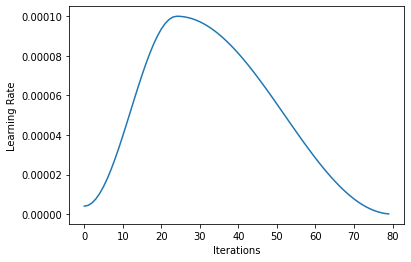

In [48]:
learn.recorder.plot_lr()

In [5]:
path = untar_data(URLs.BIWI_HEAD_POSE)
path.ls()

[PosixPath('/root/.fastai/data/biwi_head_pose/18.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/04.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/03.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/17.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/09'),
 PosixPath('/root/.fastai/data/biwi_head_pose/10.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/02.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/15.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/23.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/11'),
 PosixPath('/root/.fastai/data/biwi_head_pose/15'),
 PosixPath('/root/.fastai/data/biwi_head_pose/08.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/14'),
 PosixPath('/root/.fastai/data/biwi_head_pose/08'),
 PosixPath('/root/.fastai/data/biwi_head_pose/21'),
 PosixPath('/root/.fastai/data/biwi_head_pose/20'),
 PosixPath('/root/.fastai/data/biwi_head_pose/01'),
 PosixPath('/root/.fastai/data/biwi_head_pose/13.obj'),
 PosixPath('/root/.fasta

In [6]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [7]:
fname = '09/frame_00667_rgb.jpg'

In [8]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

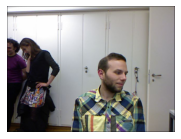

In [9]:
img = open_image(path/fname)
img.show()

In [10]:
img2txt_name(fname)

PosixPath('/root/.fastai/data/biwi_head_pose/09/frame_00667_pose.txt')

In [11]:
with open("/root/.fastai/data/biwi_head_pose/09/frame_00667_pose.txt", "r") as f:
  print(f.read())

0.804344 -0.193884 -0.56164 
0.145617 0.98076 -0.130024 
0.576043 0.0227998 0.817101 

187.332 40.3892 893.135 




In [12]:
ctr = np.genfromtxt(img2txt_name(fname), skip_header=3); ctr

array([187.332 ,  40.3892, 893.135 ])

In [13]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2,c1])

In [14]:
convert_biwi(ctr)

tensor([263.9104, 428.5814], dtype=torch.float64)

In [15]:
def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)

In [16]:
def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [63]:
get_ctr(fname)

tensor([263.9104, 428.5814], dtype=torch.float64)

In [23]:
ctr = get_ctr(fname)
# get_ip(img, ctr)
a = ImagePoints(FlowField(img.size, ctr))

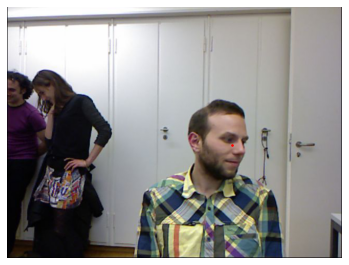

In [26]:
ctr = get_ctr(fname)
img.show(y=get_ip(img, ctr), figsize=(6, 6))

In [20]:
img.size

torch.Size([480, 640])

In [ ]:
path.ls()

In [27]:
src = PointsItemList.from_folder(path).split_by_valid_func(lambda o: o.parent.name == '13').label_from_func(get_ctr)

In [28]:
src

LabelLists;

Train: LabelList (15193 items)
x: PointsItemList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: PointsLabelList
ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640)
Path: /root/.fastai/data/biwi_head_pose;

Valid: LabelList (485 items)
x: PointsItemList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: PointsLabelList
ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640)
Path: /root/.fastai/data/biwi_head_pose;

Test: None

In [30]:
get_transforms()

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [31]:
bs = 16
data = src.transform(([], []), size = (240, 320)).databunch(bs = bs).normalize(imagenet_stats)

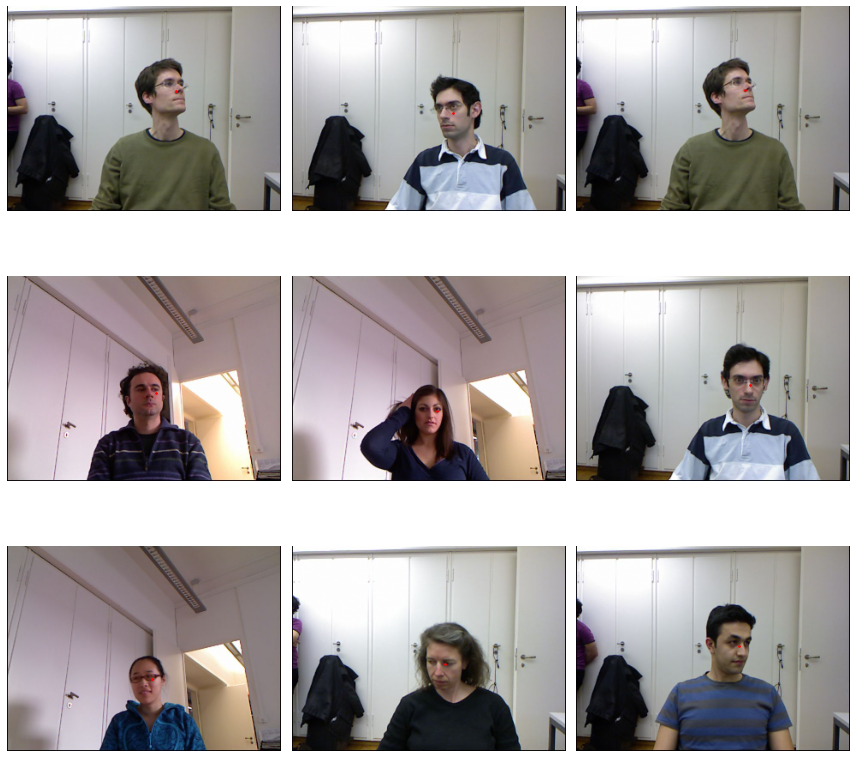

In [33]:
data.show_batch(rows = 3)

In [34]:
learn = cnn_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


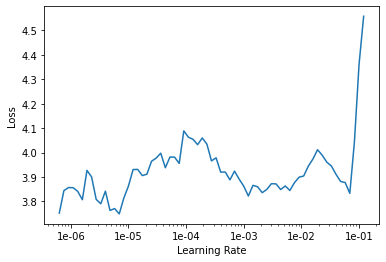

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(3, slice(4e-03))

epoch,train_loss,valid_loss,time
0,0.066755,0.008630,01:14
1,0.006967,0.000616,01:16
2,0.002164,0.001302,01:16


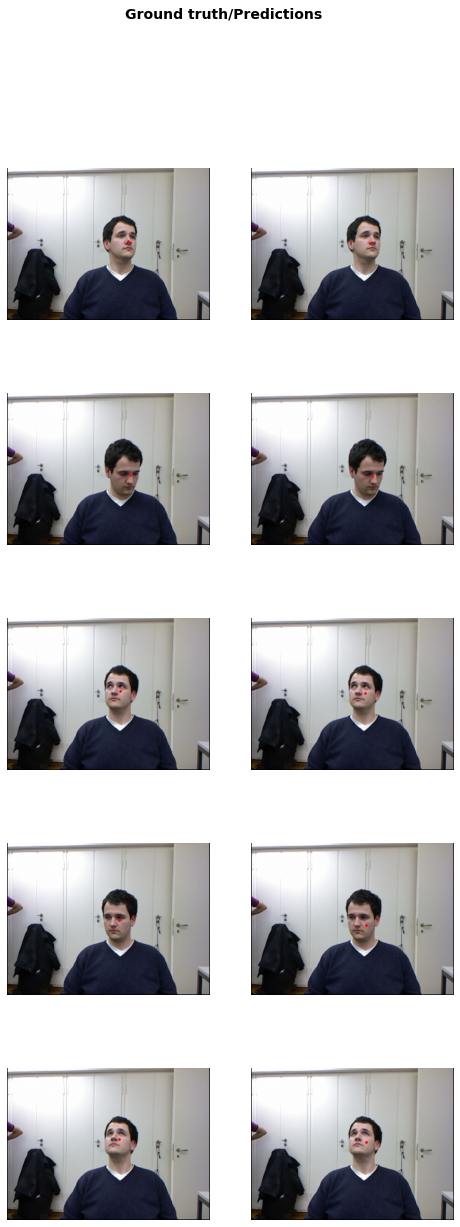

In [37]:
learn.show_results()

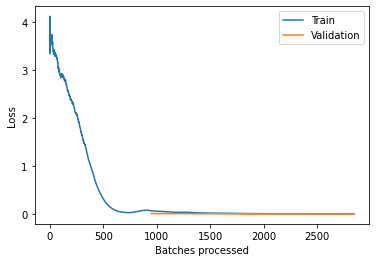

In [39]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


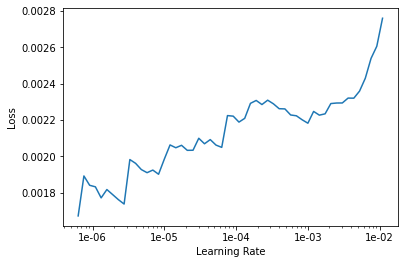

In [40]:
learn.lr_find()
learn.recorder.plot()

In [42]:
learn.unfreeze()
learn.save('stage-1')

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


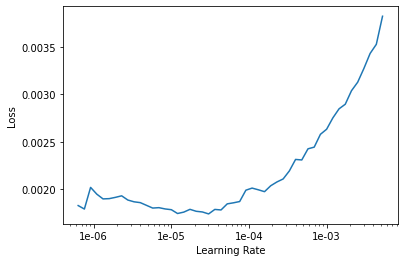

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(4, slice(1e-04))

epoch,train_loss,valid_loss,time
0,0.001436,0.000344,01:17
1,0.001648,0.000639,01:19
2,0.001475,0.000373,01:17
3,0.001151,0.000665,01:17


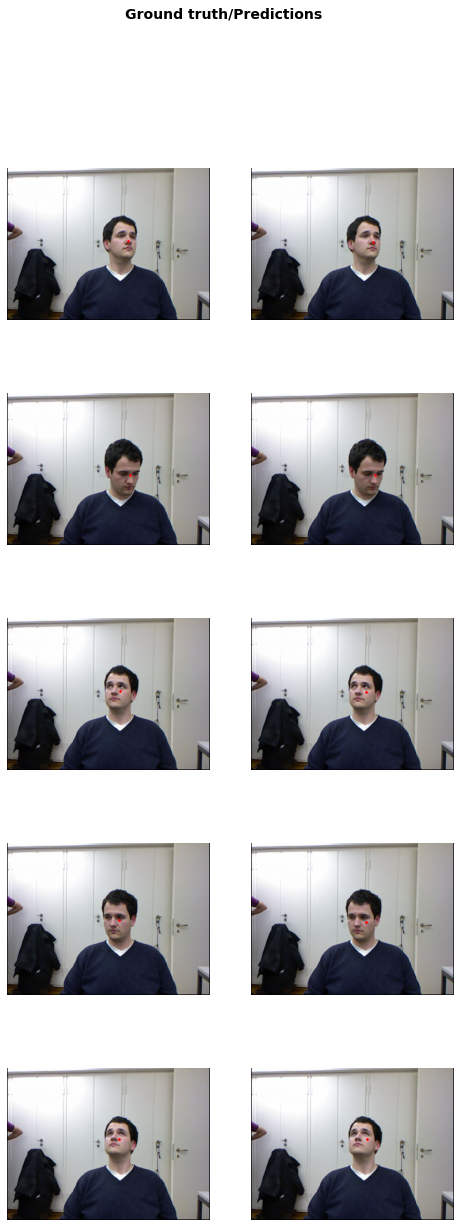

In [46]:
learn.show_results()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


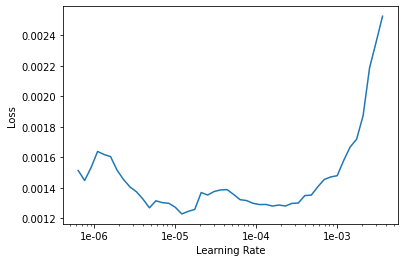

In [47]:
learn.lr_find()
learn.recorder.plot()

In [48]:
learn.save('stage-2')

In [49]:
new_data = src.transform(([], []), size = (480, 640)).databunch(bs = bs).normalize(imagenet_stats)

In [50]:
nlearn = cnn_learner(new_data, models.resnet34)
learn = None
gc.collect()

5849

In [51]:
nlearn.load('stage-2')
nlearn.freeze()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


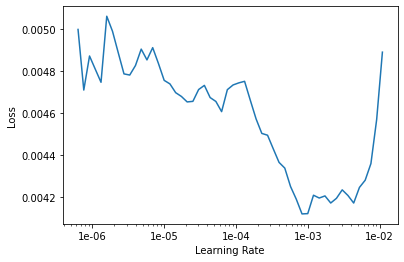

In [52]:
nlearn.lr_find()
nlearn.recorder.plot()

In [53]:
nlearn.fit_one_cycle(2, slice(4e-04))

epoch,train_loss,valid_loss,time
0,0.002251,0.001237,01:34
1,0.001573,0.001510,01:34


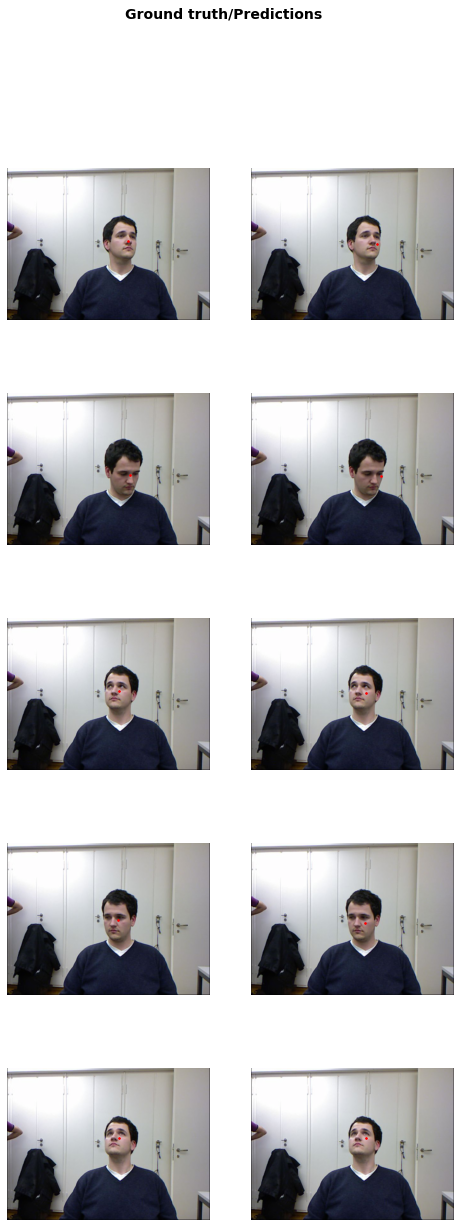

In [54]:
nlearn.show_results()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


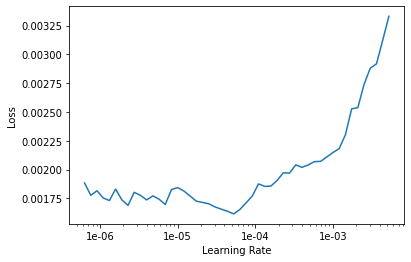

In [55]:
learn = nlearn
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [56]:
learn.fit_one_cycle(4, slice(1e-05))

epoch,train_loss,valid_loss,time
0,0.001431,0.000965,02:13
1,0.001446,0.001269,02:13
2,0.001331,0.000977,02:13
3,0.001408,0.000740,02:13


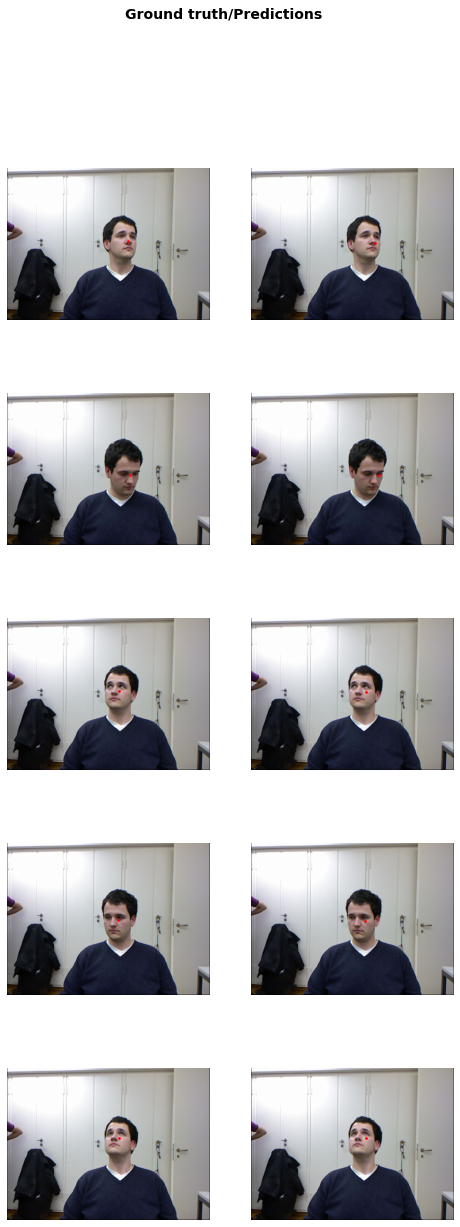

In [57]:
learn.show_results()

In [58]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


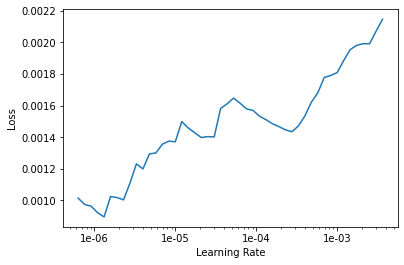

In [59]:
learn.recorder.plot()